In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/crmnwn06/minecraft-data/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/crmnwn06/minecraft-data/refs/heads/main/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [8]:
## the data is not tidy because there are multiple variables in start time and end time
sessions_tidy <- sessions |>
    select(-starts_with("original")) |>
    separate(col=start_time, into=c("start_date","start_time"),sep="\ ")|>
    separate(col=end_time, into=c("end_date","end_time"),sep="\ ")|>
    separate(col=start_time, into=c("start_hour","start_minute"),sep=":")|>
    separate(col=end_time, into=c("end_hour","end_minute"),sep=":")|>
    separate(col=start_date, into=c("start_date","start_month","start_year"),sep="/")|>
    separate(col=end_date, into=c("end_date","end_month","end_year"),sep="/")
sessions_tidy

hashedEmail,start_date,start_month,start_year,start_hour,start_minute,end_date,end_month,end_year,end_hour,end_minute
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,06,2024,18,12,30,06,2024,18,24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,06,2024,23,33,17,06,2024,23,46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,07,2024,17,34,25,07,2024,17,57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25,07,2024,03,22,25,07,2024,03,58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25,05,2024,16,01,25,05,2024,16,12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23,06,2024,15,08,23,06,2024,17,10
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15,04,2024,07,12,15,04,2024,07,21
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21,09,2024,02,13,21,09,2024,02,30
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21,06,2024,02,31,21,06,2024,02,49


In [11]:
## all mean values in the players dataset
mean <- players|>
    summarise(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE)
        )
mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


**1. DATA DESCRIPTION**

The data consists of two CSV files: players.csv and sessions.csv. These datasets share a common key (hashedEmail). The data is collected from the game server logs and player records. 

Number of observations:
- players: 196 rows
- sessions: 1535 rows

Number of variables:
- players: 7 columns
- sessions: 5 columns

Name and type of variables and their description: 
- experience: character, classification for the player type by their how experienced they are
- hashedEmail: character, unique identifier for players
- name: character, name of each participant
- gender: character, gender of each participant
- played_hours: double precision, total time the player has spent in the game in hours
- Age: double precision, the age of each participant
- subscribe: logical, whether the participant is subscribed to game-related newsletter
- start_time: character, time when a player starts a session
- end_time: character, time when a player ends a session
- original_start_time: double precision, unix epoch start time in milliseconds after January 1st, 1970
- original_end_time: double precision, unix epoch end time in milliseconds after January 1st, 1970

Summary statistics: 
- Mean total play time (played_hours): 5.845918 (hours)
- Mean age of players (Age): 20.52062 (years)

Issues in the data:
- Response bias: some players preferred not to say their age or their gender

Potential issues:
- Timezone inconsistencies: timestamps need to be standardized if they are in different time zones
- Duplicate entries: players with multiple sessions need aggregation for meaningful analysis
- Session overlaps players might have overlapping sessions due to re-logins or errors
- Unbalanced data: some player types may have significantly more data than others

**2. Questions** 
Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can a player's total play time (played_hours) and age (Age) predict their subscription status (subscribe) in the dataset?

The players dataset contains information about players' total playtime (played_hours), age (Age), and gender (gender). By analyzing these variables, I can determine if playtime and age influence the likelihood of a player being a certain gender.

Data Wrangling Plan:
- Convert relevant columns: played_hours and Age to numeric, change subscribe to factor 
- Remove missing (NA) or unrealistic values
    - Exclude negative or missing playtime (played_hours)
    - Exclude invalid ages (e.g., Age < 0 or Age > 100)
- Ensure subscribe has no missing values

**3. Exploratory Data Analysis and Visualization**
Exploratory visualizations: 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


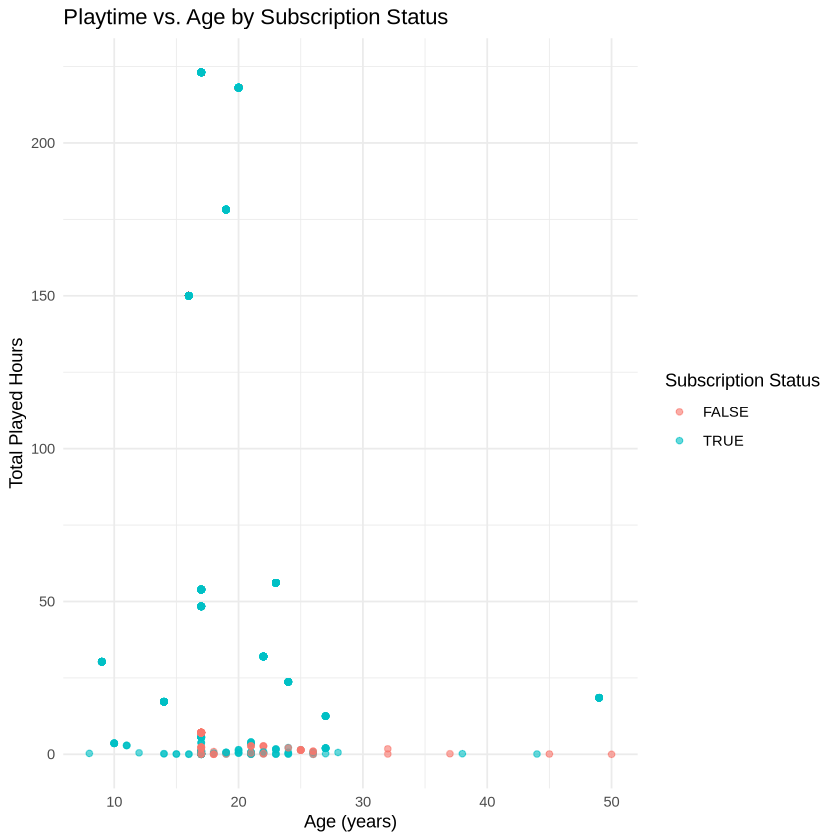

In [13]:
## Scatter Plot: Playtime vs. Age (Colored by Subscription Status)
ggplot(players, aes(x = Age, y = played_hours, color = as.factor(subscribe))) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Playtime vs. Age by Subscription Status",
    x = "Age (years)",
    y = "Total Played Hours",
    color = "Subscription Status"
  ) +
  theme_minimal()

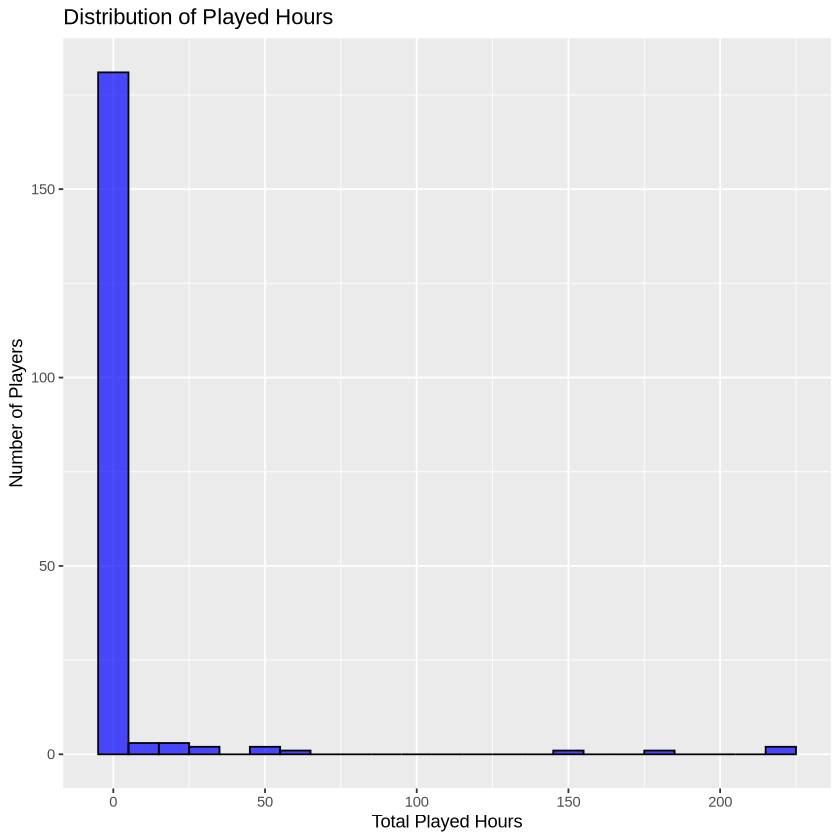

In [15]:
# Histogram of played hours
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "blue", alpha = 0.7, color = "black") +
  labs(
    title = "Distribution of Played Hours",
    x = "Total Played Hours",
    y = "Number of Players"
  ) 


Insights from Visualizations:
- The scatter plot may show trends where younger players or longer playtime are linked to higher subscription rates, and helps determine whether classification or regression prediction model should be used. From the shape of the graph, I think that a knn classification would be the best because the graph does not look linear
- The histogram helps identify that playtime follows a right-skewed distribution

**4. Methods and Plan**
Selected Method: K-Nearest Neighbors (KNN) for Predicting Subscription Status

I will use the KNN algorithm to predict whether a player subscribes to the newsletter based on their total playtime (played_hours) and age (Age)

Why is KNN Appropriate?  
- KNN is a non-parametric method that classifies a player based on the majority class among the "k" nearest players
- No assumptions on data distribution like shape of data
- The dataset is not extremely large, KNN can be effective while providing accurate predictions  

Assumptions Required for KNN
- Since KNN relies on distance metrics (e.g., Euclidean distance), standardization of variables is required to ensure fair distance calculations  
- The number of neighbors (k) is crucial to prevent overfitting (low k) or underfitting (high k)  
- Assumes that played_hours and Age contain meaningful information to predict subscribe status  

Potential Limitations of KNN
- If played_hours and Age are weak predictors, KNN may not perform well  
- If the number of subscribed players is significantly lower than non-subscribed players, KNN may favor the majority class  


Model Comparison and Selection
- I will tune k (number of neighbors) using cross-validation and compare performance based on accuracy, precision, and recall  
- The best k value will be chosen based on the validation set performance    

1. Prepare Data for Modeling
- Use the initial split function to split the dataset into training (80%) and testing (20%) sets
- Normalize numerical features to ensure equal influence in distance calculations

2. Train a Predictive Model
- Choose an optimal value of k using cross-validation
- Train the k-NN model on the training set
- Predict subscription status on the test set
- Measure performance using accuracy, confusion matrix, precision, and recall
  
3. Evaluate Model Performance
- Create a confusion matrix to compare actual vs. predicted values
- Calculate accuracy

4. Interpretation and Next Steps
- If playtime and age significantly influence subscription status, this model can be used to determine whether players who are more likely to subscribe
- If the model's accuracy is low
    - Experiment with different thresholds for regression